In [343]:
from datascience import *
import numpy as np
import math
import scipy.stats as stats
import pandas as pd

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [344]:
df = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_511444.csv')
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.057510e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.505888e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09,NaN
5,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.110062e+12,2.501834e+12,2.787006e+12,2.867265e+12,2.908360e+12,2.557990e+12,2.506119e+12,2.588874e+12,2.781589e+12,NaN
6,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.825751e+11,4.141789e+11,NaN
7,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,4.236274e+11,5.301633e+11,5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.426959e+11,5.184751e+11,NaN
8,Armenia,ARM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.054614e+10,1.152746e+10,1.243309e+10,NaN
9,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.610000e+08,6.530000e+08,6.340000e+08,NaN,NaN


In [345]:
df1 = df.copy()
df1.drop(df1.iloc[:, 2:-24], inplace = True, axis = 1) 
df1.drop(df1.columns[0], inplace = True, axis = 1) 
df1

,Country Code,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,...,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN
1,AFG,NaN,NaN,NaN,NaN,NaN,NaN,4.055177e+09,4.515563e+09,5.226775e+09,...,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN
2,AGO,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,...,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.057510e+11,NaN
3,ALB,3.199643e+09,2.258516e+09,2.545967e+09,3.212119e+09,3.480355e+09,3.922099e+09,4.348070e+09,5.611492e+09,7.184681e+09,...,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.505888e+10,NaN
4,AND,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,...,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09,NaN
5,ARB,5.783988e+11,6.134324e+11,5.916816e+11,6.440507e+11,7.351881e+11,7.234491e+11,7.292314e+11,8.233413e+11,9.643273e+11,...,2.110062e+12,2.501834e+12,2.787006e+12,2.867265e+12,2.908360e+12,2.557990e+12,2.506119e+12,2.588874e+12,2.781589e+12,NaN
6,ARE,7.357123e+10,7.883901e+10,7.567434e+10,8.444547e+10,1.043374e+11,1.033116e+11,1.098162e+11,1.243464e+11,1.478244e+11,...,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.825751e+11,4.141789e+11,NaN
7,ARG,2.721498e+11,2.928590e+11,2.989482e+11,2.835230e+11,2.842038e+11,2.686968e+11,9.772400e+10,1.275870e+11,1.646579e+11,...,4.236274e+11,5.301633e+11,5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.426959e+11,5.184751e+11,NaN
8,ARM,1.596969e+09,1.639492e+09,1.893726e+09,1.845482e+09,1.911564e+09,2.118468e+09,2.376335e+09,2.807061e+09,3.576615e+09,...,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.054614e+10,1.152746e+10,1.243309e+10,NaN
9,ASM,NaN,NaN,NaN,NaN,NaN,NaN,5.140000e+08,5.270000e+08,5.120000e+08,...,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.610000e+08,6.530000e+08,6.340000e+08,NaN,NaN


In [346]:
medal = pd.read_csv('summer.csv')
medal

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [347]:
filter1 = medal["Year"] > 1993
medal_1 = medal.copy()
medal_1.where(filter, inplace = True)

In [348]:
medal_2 = medal_1.dropna(axis=0)
medal_2

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
1,1896.0,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
6,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
10,1896.0,Athens,Aquatics,Swimming,"PEPANOS, Antonios",GRE,Men,400M Freestyle,Silver
15,1896.0,Athens,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110M Hurdles,Gold
24,1896.0,Athens,Athletics,Athletics,"FLACK, Edwin",AUS,Men,800M,Gold
30,1896.0,Athens,Athletics,Athletics,"CONNOLLY, James",USA,Men,High Jump,Silver
35,1896.0,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze
40,1896.0,Athens,Athletics,Athletics,"HOYT, William Welles",USA,Men,Pole Vault,Gold
41,1896.0,Athens,Athletics,Athletics,"TYLER, Albert",USA,Men,Pole Vault,Silver
46,1896.0,Athens,Athletics,Athletics,"CONNOLLY, James",USA,Men,Triple Jump,Gold


In [349]:
medal_3 = medal_2.copy()
medal_3.drop(medal_3 .iloc[:, 1:5], inplace = True, axis = 1) 
medal_3.drop(medal_3 .iloc[:, 2:], inplace = True, axis = 1) 
medal_3

,Year,Country
1,1896.0,AUT
6,1896.0,HUN
10,1896.0,GRE
15,1896.0,USA
24,1896.0,AUS
30,1896.0,USA
35,1896.0,HUN
40,1896.0,USA
41,1896.0,USA
46,1896.0,USA


In [350]:
a = medal_3.groupby(['Year', 'Country']).size().reset_index(name='counts')
a

,Year,Country,counts
0,1896.0,AUS,1
1,1896.0,AUT,2
2,1896.0,DEN,2
3,1896.0,FRA,2
4,1896.0,GBR,1
5,1896.0,GER,8
6,1896.0,GRE,4
7,1896.0,HUN,2
8,1896.0,SUI,2
9,1896.0,USA,7


In [351]:
set_in = df1.set_index("Country Code")
set_in
stacked = set_in.stack().reset_index(name='years')
stacked_1 = stacked.rename(columns = {"level_1": "Year", "Country Code": "Country", "years": "GDP"})
stacked_1

,Country,Year,GDP
0,ABW,1996,1.379961e+09
1,ABW,1997,1.531944e+09
2,ABW,1998,1.665101e+09
3,ABW,1999,1.722799e+09
4,ABW,2000,1.873453e+09
5,ABW,2001,1.920112e+09
6,ABW,2002,1.941341e+09
7,ABW,2003,2.021229e+09
8,ABW,2004,2.228492e+09
9,ABW,2005,2.330726e+09


In [352]:
stacked_1['Year'] = stacked_1['Year'].str.replace('%','').astype(np.float64)

In [353]:
after_merge = pd.merge(stacked_1, a, on=['Country', 'Year'])
after_merge

,Country,Year,GDP,counts
0,AFG,2008.0,1.010922e+10,1
1,AFG,2012.0,2.000162e+10,1
2,ARG,1996.0,2.721498e+11,20
3,ARG,2000.0,2.842038e+11,20
4,ARG,2004.0,1.646579e+11,47
5,ARG,2008.0,3.615580e+11,51
6,ARG,2012.0,5.459824e+11,20
7,ARM,1996.0,1.596969e+09,2
8,ARM,2000.0,1.911564e+09,1
9,ARM,2008.0,1.166204e+10,6


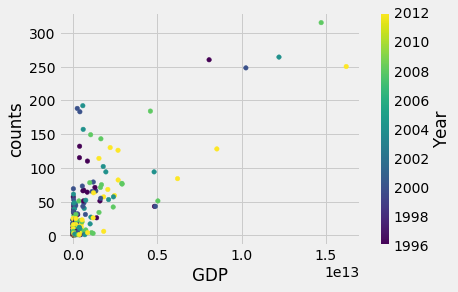

In [354]:
ax1 = after_merge.plot.scatter(x='GDP', y='counts', c='Year',colormap='viridis')

# df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

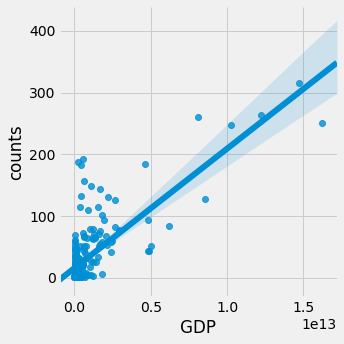

In [355]:
import seaborn as sns
sns.lmplot(x='GDP', y='counts',data=after_merge,fit_reg=True)

In [356]:
import statsmodels.formula.api as smf

result = smf.ols(formula="counts ~ GDP", data=after_merge).fit()

print(result.params)

Intercept    1.550216e+01
GDP          1.934513e-11
dtype: float64


In [357]:
after_merge_1 = after_merge.copy()
after_merge_1["Fitted Value"] = pd.Series(result.predict(),index=after_merge_1.index)
after_merge_1["Residual"] = pd.Series(after_merge_1["counts"]-result.predict(),index=after_merge_1.index)
after_merge_1

,Country,Year,GDP,counts,Fitted Value,Residual
0,AFG,2008.0,1.010922e+10,1,15.697720,-14.697720
1,AFG,2012.0,2.000162e+10,1,15.889089,-14.889089
2,ARG,1996.0,2.721498e+11,20,20.766928,-0.766928
3,ARG,2000.0,2.842038e+11,20,21.000115,-1.000115
4,ARG,2004.0,1.646579e+11,47,18.687485,28.312515
5,ARG,2008.0,3.615580e+11,51,22.496544,28.503456
6,ARG,2012.0,5.459824e+11,20,26.064257,-6.064257
7,ARM,1996.0,1.596969e+09,2,15.533049,-13.533049
8,ARM,2000.0,1.911564e+09,1,15.539135,-14.539135
9,ARM,2008.0,1.166204e+10,6,15.727759,-9.727759


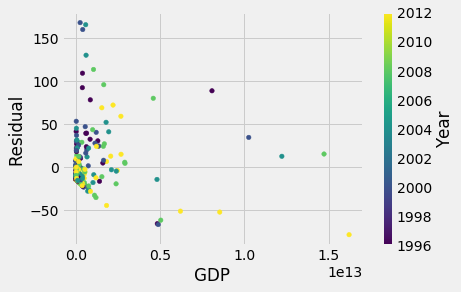

In [358]:
ax3 = after_merge_1.plot.scatter(x='GDP', y='Residual', c='Year',colormap='viridis')

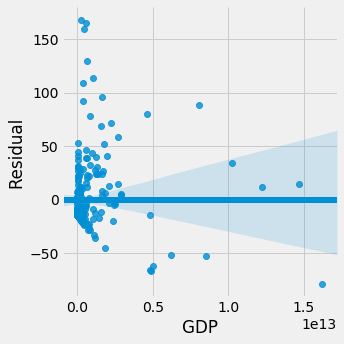

In [359]:
sns.lmplot(x='GDP', y='Residual',data=after_merge_1,fit_reg=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ce49748d0>]],
      dtype=object)

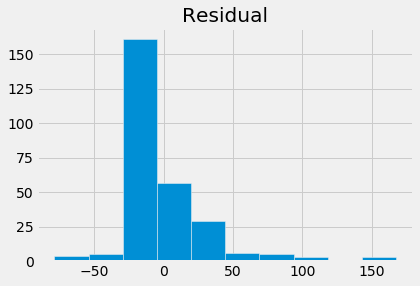

In [360]:
after_merge_1.hist('Residual',bins=10)

In [361]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 counts   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     373.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.96e-53
Time:                        16:57:22   Log-Likelihood:                -1336.2
No. Observations:                 274   AIC:                             2676.
Df Residuals:                     272   BIC:                             2684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.5022      2.058      7.533      0.000      11.451      19.554
GDP         1.935e-11      1e-12     19.321      0.000    1.74e-11    2.13e-11
==============================================================================
Omnibus:                      165.655   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1162.099
Skew:                           2.442   Prob(JB):                    4.50e-253
Kurtosis:                      11.829   Cond. No.                     2.20e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [362]:
filter = after_merge_1["Year"] == 2012
after_merge_1.where(filter,inplace = True)
# fig, ax = plt.subplots()
# ax.plot(x1, y, 'o', label="Data")
# ax.plot(x1, y_true, 'b-', label="True")
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
# ax.legend(loc="best");

In [363]:
after_merge_1.dropna()

,Country,Year,GDP,counts,Fitted Value,Residual
1,AFG,2012.0,2.000162e+10,1.0,15.889089,-14.889089
6,ARG,2012.0,5.459824e+11,20.0,26.064257,-6.064257
10,ARM,2012.0,1.061932e+10,2.0,15.707588,-13.707588
15,AUS,2012.0,1.546152e+12,114.0,45.412666,68.587334
24,AZE,2012.0,6.968394e+10,10.0,16.850201,-6.850201
30,BEL,2012.0,4.978842e+11,3.0,25.133792,-22.133792
35,BLR,2012.0,6.568510e+10,21.0,16.772843,4.227157
40,BRA,2012.0,2.465189e+12,59.0,63.191557,-4.191557
41,BRN,2012.0,1.904850e+10,1.0,15.870651,-14.870651
46,CAN,2012.0,1.823967e+12,57.0,50.787032,6.212968


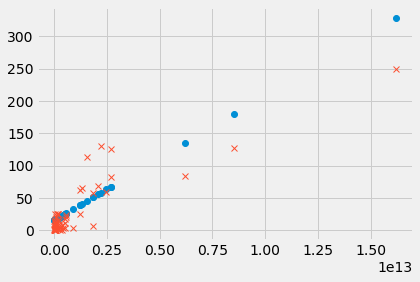

In [364]:
fig, ax = plt.subplots()
ax.plot(after_merge_1["GDP"],after_merge_1["Fitted Value"], 'o', label="Data")
ax.plot(after_merge_1["GDP"], after_merge_1["counts"], 'x', label="True")
#ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
# ax.plot(x1, y_true, 'b-', label="True")
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
# ax.legend(loc="best");

In [365]:
filter = stacked_1["Year"] == 2018
stacked_1.where(filter,inplace = True)
stacked_2 = stacked_1.dropna()

In [366]:
after_merge_2018 = pd.merge(after_merge_1, stacked_2, on=['Country'])
after_merge_2018_1 = after_merge_2018[["Country","GDP_y"]]
after_merge_2018_2 = after_merge_2018_1.rename(columns = {"GDP_y": "GDP"})
after_merge_2018_2

,Country,GDP
0,AFG,1.936297e+10
1,ARG,5.184751e+11
2,ARM,1.243309e+10
3,AUS,1.432195e+12
4,AZE,4.693953e+10
5,BEL,5.317669e+11
6,BLR,5.966250e+10
7,BRA,1.868626e+12
8,BRN,1.356710e+10
9,CAN,1.712510e+12


In [367]:
after_merge_2018_2["predict"] = result.predict(after_merge_2018_2["GDP"])
after_merge_2018_2["ratio"] = after_merge_2018_2["predict"]/after_merge_2018_2["predict"].sum()
after_merge_2018_2["predicted medal number"] = np.round(after_merge_2018_2["ratio"]*600)
after_merge_2018_3 = after_merge_2018_2[["Country","predicted medal number"]]
after_merge_2018_3.sort_values(by=['predicted medal number'],ascending=False)

,Country,predicted medal number
56,USA,111.0
10,CHN,75.0
31,JPN,30.0
21,FRA,19.0
23,GBR,19.0
27,IND,18.0
29,ITA,15.0
7,BRA,14.0
44,RUS,13.0
9,CAN,13.0
